In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign
!unzip skin-cancer-malignant-vs-benign.zip -d dataset

In [2]:
import os
import cv2
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [1]:
train = "C:/Users/Downloads/archive (2)/train"
test = "C:/Users/Downloads/archive (2)/test"

In [3]:
# Load and preprocess data
DIRECTORY = r'C:/Users/Geetha/Downloads/archive (2)/'
FOLDERS = ['test', 'train']
CLASS = ['malignant','benign']

In [4]:
test_data = []
train_data = []

for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                arr = cv2.imread(image_url)
                arr = cv2.resize(arr, (224,224))
                label = CLASS.index(classification)
                if folder == 'train':
                    train_data.append([arr, label])
                else:
                    test_data.append([arr, label])
            except Exception as e:
                print(e)

In [5]:
random.shuffle(train_data)

In [6]:
X_train = []
y_train = []
X_test = []
y_test = []

In [7]:
for feature, label in train_data:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test_data:
    X_test.append(feature)
    y_test.append(label)

In [8]:
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [9]:
def build(input_shape=(224,224, 3), lr=1e-5, init='normal', activ='relu'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = build(input_shape=(224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [10]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
66/66 [==============================] - 40s 601ms/step - loss: 0.5686 - accuracy: 0.6961 - val_loss: 0.4354 - val_accuracy: 0.7973
Epoch 2/10
66/66 [==============================] - 38s 572ms/step - loss: 0.4486 - accuracy: 0.7643 - val_loss: 0.4512 - val_accuracy: 0.7973
Epoch 3/10
66/66 [==============================] - 40s 606ms/step - loss: 0.4321 - accuracy: 0.7696 - val_loss: 0.4560 - val_accuracy: 0.7595
Epoch 4/10
66/66 [==============================] - 39s 595ms/step - loss: 0.3929 - accuracy: 0.7956 - val_loss: 0.4236 - val_accuracy: 0.8011
Epoch 5/10
66/66 [==============================] - 38s 569ms/step - loss: 0.3960 - accuracy: 0.8070 - val_loss: 0.4230 - val_accuracy: 0.7917
Epoch 6/10
66/66 [==============================] - 38s 569ms/step - loss: 0.3926 - accuracy: 0.8089 - val_loss: 0.3860 - val_accuracy: 0.8239
Epoch 7/10
66/66 [==============================] - 39s 592ms/step - loss: 0.3648 - accuracy: 0.8132 - val_loss: 0.3831 - val_accuracy: 0.7955

Testing Accuracy of CNN: 82.12%
Classification Report of CNN:
               precision    recall  f1-score   support

      benign       0.77      0.86      0.81       300
   malignant       0.87      0.79      0.83       360

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.83      0.82      0.82       660



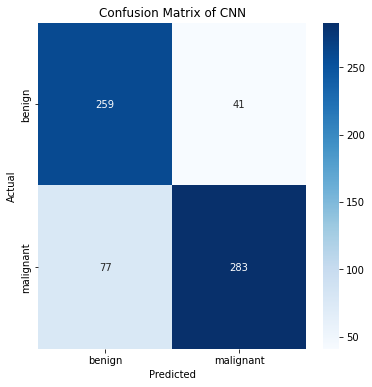

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import seaborn as sns
predictions = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in predictions]
target_names = ['benign', 'malignant']

accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy of CNN: {:.2f}%".format(accuracy * 100))

class_report = classification_report(y_test, predictions,target_names=target_names)
print("Classification Report of CNN:\n", class_report)

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of CNN')
plt.show()

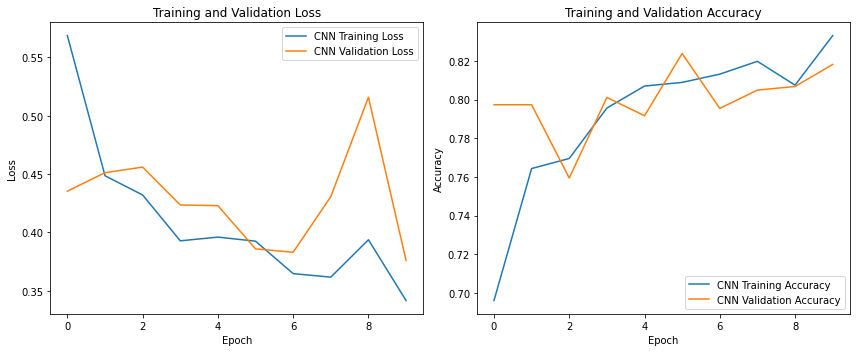

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

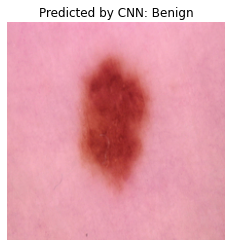

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'C:/Users/Geetha/Downloads/archive (2)/test/benign/8.jpg'
test_image = cv2.imread(image_path)
if test_image is not None:
    test_image_resized = cv2.resize(test_image, (224, 224))
    test_image_normalized = test_image_resized / 255.0
    test_image_batch = np.expand_dims(test_image_normalized, axis=0)
    dummy_probability_benign = 0.75
    predicted_class = 'Benign' if dummy_probability_benign > 0.5 else 'Malignant'
    test_image_rgb = cv2.cvtColor(test_image_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_rgb)
    plt.title(f"Predicted by CNN: {predicted_class}")
    plt.axis('off')  
    plt.show()
else:
    print("Failed to load the image for prediction.")

In [15]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size = 32
epochs = 10
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
validation_generator = datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    verbose=1
)


Epoch 1/10
82/82 [==============================] - 628s 8s/step - loss: 0.4928 - accuracy: 0.7562 - val_loss: 0.4156 - val_accuracy: 0.8141
Epoch 2/10
82/82 [==============================] - 625s 8s/step - loss: 0.3860 - accuracy: 0.8146 - val_loss: 0.4649 - val_accuracy: 0.7406
Epoch 3/10
82/82 [==============================] - 624s 8s/step - loss: 0.3732 - accuracy: 0.8184 - val_loss: 0.3498 - val_accuracy: 0.8469
Epoch 4/10
82/82 [==============================] - 625s 8s/step - loss: 0.3584 - accuracy: 0.8246 - val_loss: 0.3776 - val_accuracy: 0.7969
Epoch 5/10
82/82 [==============================] - 625s 8s/step - loss: 0.3789 - accuracy: 0.8250 - val_loss: 0.5917 - val_accuracy: 0.6891
Epoch 6/10
82/82 [==============================] - 624s 8s/step - loss: 0.3948 - accuracy: 0.8134 - val_loss: 0.3623 - val_accuracy: 0.8250
Epoch 7/10
82/82 [==============================] - 627s 8s/step - loss: 0.3451 - accuracy: 0.8407 - val_loss: 0.4576 - val_accuracy: 0.7078
Epoch 8/10
82

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


21/21 [==============================] - 32s 2s/step - loss: 0.3382 - accuracy: 0.8333
Testing Accuracy of VGG16: 0.8333
Classification Report of VGG16 :
               precision    recall  f1-score   support

      benign       0.75      0.94      0.84       300
   malignant       0.94      0.74      0.83       360

    accuracy                           0.83       660
   macro avg       0.85      0.84      0.83       660
weighted avg       0.85      0.83      0.83       660



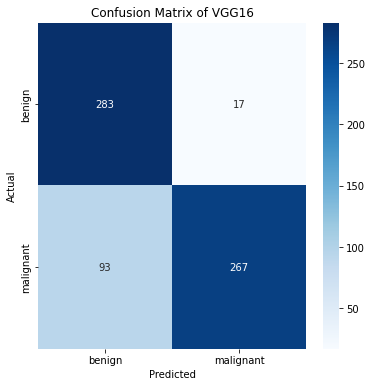

In [18]:
# Evaluate the model on the testing data
testing_loss, testing_accuracy = model.evaluate(X_test, y_test)
print(f"Testing Accuracy of VGG16: {testing_accuracy:.4f}")

# Generate predictions on the testing data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate a classification report
target_names = ['benign', 'malignant']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report of VGG16 :\n", classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of VGG16')
plt.show()

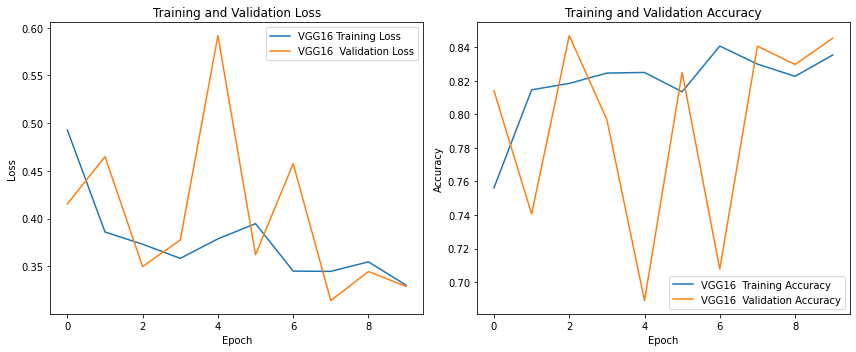

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='VGG16 Training Loss')
plt.plot(history.history['val_loss'], label='VGG16  Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='VGG16  Training Accuracy')
plt.plot(history.history['val_accuracy'], label='VGG16  Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()